# Ch. 1 - Setup

First we import the required dependencies.

In [56]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Then we load the data provided on Aulis from github to our project directory.

In [57]:
DATASETS_URL = "https://github.com/TurboThommy/ml4ds-end-to-end-project/blob/main/data/"
DATASET_DIR = "datasets"

# File names
TRAINING_DATA_FILENAME = "Vehicles_export_prices_scaled_train_eng.xlsx"
TEST_DATA_FILENAME = "Vehicles_export_prices_scaled_stud_test_eng.xlsx"

def fetch_file_from_url(src_url, dest_path, file_name):
    if not os.path.isdir(dest_path):
        os.makedirs(dest_path)
    file_url = src_url + file_name + "?raw=true"
    file_path = os.path.join(dest_path, file_name)
    urllib.request.urlretrieve(file_url, file_path)

fetch_file_from_url(DATASETS_URL, DATASET_DIR, TRAINING_DATA_FILENAME)

Load the training data set and print the first few rows.

In [58]:
TRAINING_DATA_PATH = os.path.join("datasets", TRAINING_DATA_FILENAME)

def load_data(data_path):
    return pd.read_excel(data_path)

training_data_df = load_data(TRAINING_DATA_PATH)
training_data_df.head()

,RPAKREP_VEHICLE_HKEY,COMPANY,OFFICE,OFFICE_MAIN_BRAND,CHASSIS_NUMBER,MANUFACTURER_SHORT,MANUFACTURER,VEHICLE_GROUP,VEHICLE_TYPE,MODEL_CODE,...,CUSTOMER_SALE_GROUP_NAME,CUSTOMER_SALE_GROUP2,CUSTOMER_SALE_GROUP2_NAME,SCALED_CURRENT_VALUE,SCALED_INVENTURAL_VALUE,SCALED_REPORT_VALUE,SCALED_VALUATION_PRICE,SCALED_GUIDE_PRICE,SCALED_TOTAL_SALES_PRICE_BASIS,SCALED_TOTAL_SALE_PRICE
0,77c1af48604226d47b2ccf7be44df009,44.0,TA,TOY,WF01XXERK1JR43779,FOR,Ford,ECS,ECOSPORT 1.0 Titanium Eco,NaN,...,EV privat,EVPR,Endverbraucher private,0.052907,0.000000,0.950043,0.0,0.002975,0.011018,0.011321
1,39587e4f9324333232d2ffaa2f314e6d,12.0,44,VOL,YV1XZK7V5S2487523,VOL,Volvo,XC4,"XC40 B3 B DKG Core 120 kW, 5-t",536K7170F1,...,NaN,NaN,NaN,0.061605,0.000000,0.950043,0.0,0.006136,0.026411,0.019844
2,a91470879cf756368c1d0099a2fa939a,27.0,33,SKO,WF0DXXSK0RX009819,FOR,Ford,TOC,Tourneo Connect 2.0 EcoBl,26,...,EV privat,EVPR,Endverbraucher private,0.063286,0.000000,0.950043,0.0,0.001378,0.022102,0.022053
3,61363a68ff967e7f0c4b80b46a55b141,33.0,K1,V,WVWZZZAWZPU075160,V,Volkswagen,POL,"POLO LIFE 1,0 L 59 KW (80 PS)",AE13GV,...,Interne Kunden,INT,Interne Kunden,0.042565,0.029537,0.897257,0.0,0.001378,0.000000,0.000572
4,fd5b09f7d857904d03a36d1a479f2ca4,10.0,96,FOR,WF0PXXGCHPRC20073,FOR,Ford,FOC,FOCUS TITA 5W 1.0T 125 MHEV M6,15,...,NaN,NaN,NaN,0.054914,0.000000,0.950043,0.0,0.004863,0.019715,0.013360


Print information about the loaded data frame.

In [60]:
training_data_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99071 entries, 0 to 99070
Data columns (total 106 columns):
 #    Column                          Dtype         
---   ------                          -----         
 0    RPAKREP_VEHICLE_HKEY            object        
 1    COMPANY                         float64       
 2    OFFICE                          object        
 3    OFFICE_MAIN_BRAND               object        
 4    CHASSIS_NUMBER                  object        
 5    MANUFACTURER_SHORT              object        
 6    MANUFACTURER                    object        
 7    VEHICLE_GROUP                   object        
 8    VEHICLE_TYPE                    object        
 9    MODEL_CODE                      object        
 10   VARIANT                         object        
 11   MILEAGE                         float64       
 12   OPERATING_HOURS                 float64       
 13   MILAGE_IN_FIELD                 float64       
 14   MILAGE_SALES                    floa

Sort all columns in the data frame alphabetically and print them with their corresponding data types.

In [62]:
columns = []
for col in training_data_df.columns:
    columns.append([col.title(), training_data_df[col.title().upper()].dtype])
columns.sort(key=lambda x: x[0])
columns

[['Accident_Vehicle', dtype('O')],
 ['At_Location_Since', dtype('float64')],
 ['Ccm', dtype('float64')],
 ['Certificate_Type', dtype('O')],
 ['Certificate_Type_Date', dtype('float64')],
 ['Chassis_Number', dtype('O')],
 ['Color', dtype('O')],
 ['Color_Code', dtype('O')],
 ['Color_Code_Name', dtype('O')],
 ['Color_Type', dtype('O')],
 ['Commission_Number', dtype('O')],
 ['Commission_Type', dtype('O')],
 ['Commission_Type_Name', dtype('O')],
 ['Company', dtype('float64')],
 ['Construction_Month', dtype('float64')],
 ['Curb_Weight', dtype('float64')],
 ['Customer_Feature', dtype('O')],
 ['Customer_Feature_Name', dtype('O')],
 ['Customer_Group', dtype('O')],
 ['Customer_Group_Name', dtype('O')],
 ['Customer_Sale_Group', dtype('O')],
 ['Customer_Sale_Group2', dtype('O')],
 ['Customer_Sale_Group2_Name', dtype('O')],
 ['Customer_Sale_Group_Name', dtype('O')],
 ['Customer_Type', dtype('O')],
 ['Day_Of_Registration', dtype('O')],
 ['Demonstration_Status', dtype('O')],
 ['Drive_Type', dtype('O')

Create a correlation matrix for the training data.

In [80]:
training_data_df["SCALED_TOTAL_SALES_PRICE_DIFF"] = training_data_df["SCALED_TOTAL_SALES_PRICE_BASIS"] - training_data_df["SCALED_TOTAL_SALE_PRICE"]

corr_matrix = training_data_df.select_dtypes(include=["number"]).corr()
corr_matrix["LAID_UP_TIME"].sort_values(ascending=False)

LAID_UP_TIME                      1.000000
SCALED_INVENTURAL_VALUE           0.309477
AT_LOCATION_SINCE                 0.088318
VEHICLE_MODEL_ID                  0.069666
NUMBER_AXLE                       0.062227
IS_USED_CAR                       0.049172
CURB_WEIGHT                       0.045474
NUMBER_SEATS                      0.023959
CONSTRUCTION_MONTH                0.022880
NUMBER_DOORS                      0.021205
YEAR_CONSTRUCTION                 0.013915
HORSEPOWER                        0.007891
OPTICAL_CONDITION                 0.004520
KW                                0.001492
OPERATING_HOURS                  -0.000363
OPERATION_HOURS_SALE             -0.000364
OPERATING_HOURS_SALES            -0.000364
SCALED_CURRENT_VALUE             -0.002475
SCALED_TOTAL_SALE_PRICE          -0.002475
SCALED_TOTAL_SALES_PRICE_BASIS   -0.002475
SCALED_GUIDE_PRICE               -0.002890
NUMBER_OWNERS                    -0.004510
CCM                              -0.007685
SCALED_TOTA

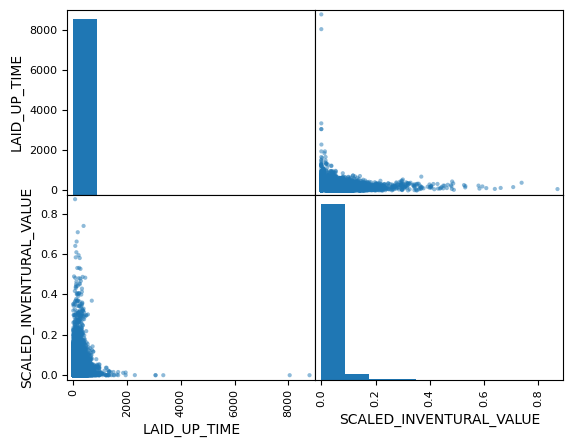

In [64]:
attributes = ["LAID_UP_TIME", "SCALED_INVENTURAL_VALUE"]
scatter_matrix(training_data_df[attributes])
plt.show()

In [65]:
training_data_df["SCALED_INVENTURAL_VALUE"].describe()

count    99004.000000
mean         0.013350
std          0.031157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          0.871569
Name: SCALED_INVENTURAL_VALUE, dtype: float64

In [79]:
print(len(training_data_df["MODEL_CODE"].unique()))
print(training_data_df["COLOR_CODE"].isnull().sum())

5000
31425
